In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

C:\Users\Bipin Krishnan P\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
(train_x, train_y),(test_x, test_y) = datasets.mnist.load_data()

In [3]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
train_x1 = train_x.astype('float32')
test_x1 = test_x.astype('float32')

In [5]:
train_x1 /= 255
test_x1 /= 255

In [6]:
#flatten the train_x and test_x images 
train_x1 = train_x1.reshape(60000, 28*28)
test_x1 = test_x1.reshape(10000, 28*28)

In [7]:
np.max(train_y)

9

In [8]:
train_y.shape[0]

60000

In [9]:
def one_hot_encode(labels, row, column):
    '''
    labels: data which is to be converted to one hot encodings
    row: number of rows in the labels data
    column: number of unique values in the labels data
    
    '''
    OHE = np.zeros((row, column))
    
    for i, label in enumerate(labels):
        OHE[i][label] = 1
        
    return OHE

In [10]:
train_y_ohe = one_hot_encode(train_y, 60000, 10)

In [11]:
train_y_ohe[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [12]:
#one hot encode the tensorflow way
train_y_ohe_tf = to_categorical(train_y, 10)

In [13]:
test_y_ohe_tf = to_categorical(test_y, 10)

In [14]:
print("############## Comparison ###############\n")
print("One Hot Encode tensorflow way: \n", train_y_ohe_tf[0:10])
print("\nOne Hot Encode manual way: \n", train_y_ohe[0:10])

############## Comparison ###############

One Hot Encode tensorflow way: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

One Hot Encode manual way: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
out = model.fit(train_x1, train_y_ohe_tf, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 28s 470us/step - loss: 0.2530 - acc: 0.9246
Epoch 2/5
60000/60000 [==============================] - 27s 456us/step - loss: 0.1482 - acc: 0.9619
Epoch 3/5
60000/60000 [==============================] - 28s 460us/step - loss: 0.1398 - acc: 0.9670
Epoch 4/5
60000/60000 [==============================] - 28s 462us/step - loss: 0.1380 - acc: 0.9698
Epoch 5/5
60000/60000 [==============================] - 28s 463us/step - loss: 0.1378 - acc: 0.9729


In [18]:
epoch = []
for i in range(5):
    epoch.append(i+1)
    
print(epoch)

[1, 2, 3, 4, 5]


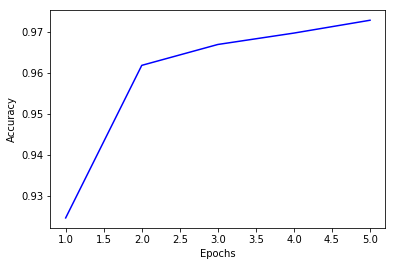

In [19]:
plt.plot(epoch, out.history['acc'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

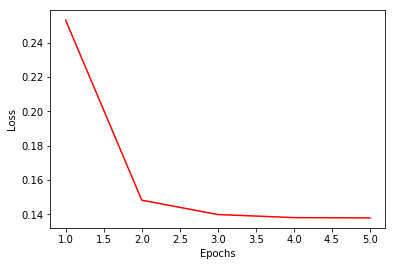

In [20]:
plt.plot(epoch, out.history['loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [21]:
model.evaluate(test_x1, test_y_ohe_tf)

10000/10000 [==============================] - 1s 102us/step


[0.12301222314931037, 0.9775]

In [47]:
def predict_result(input_data_original, input_data_reshaped, n_img=4):
    '''
    input_data_original: original image data, should be of shape -
                         (height, width, channel)
                         
    input_data_reshaped: data to which prediction is to be made          
    n_img: number of images to be displayed
    
    '''
    result = model.predict(input_data_reshaped)

    for i in range(n_img):
        #argmax returns the index of maximum value in the array
        print('Predicted Output: {}'.format(result[i].argmax()))
        plt.imshow(input_data_original[i])
        plt.show()

Predicted Output: 7


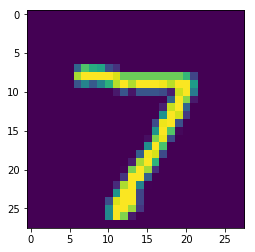

Predicted Output: 2


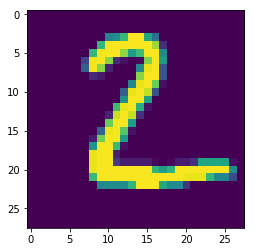

Predicted Output: 1


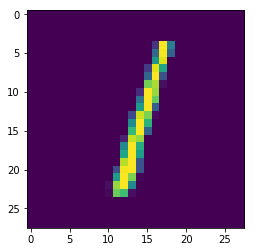

Predicted Output: 0


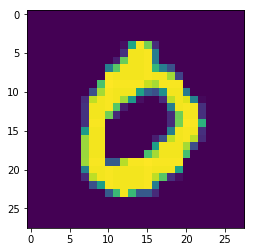

In [48]:
predict_result(test_x, test_x1)